# Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

# Carregando dados

In [11]:
# primeiramente, devemos obter os nomes de cada arquivo

path = r"DADOS_PRONTOS\EASY" + r"/"  # altere essa string com o diretório da pasta onde os dados estão
files = listdir(path)
files

['Apneia1-99_93Hz-38R-85bpm.npz',
 'Apneia2-99_94Hz-28R-88bpm.npz',
 'Apneia3-99_94Hz-13R-67bpm.npz',
 'Apneia4-99_94Hz-50R-69bpm.npz']

> Dica: no nome de cada arquivo está descrito alguns metadados sobre cada captura:
> - a frequência de amostragem do sinal, isto é, quantos pacotes por segundo capturamos;
> - quantas respirações o infivíduo deu durante a coleta (isto é, conjunto de inspiração + expiração);
> - a frequência cardíaca média da pessoa (fora do escopo).

In [15]:
# agora basta carregar os dados utilizando o numpy
dados_easy = []
for file in files:
    dados_easy.append(np.load(path + file))

print(f"Quantidade de arquivos carregados: {len(dados_easy)}")

Quantidade de arquivos carregados: 4


In [20]:
# verificando se os arquivos foram carregados corretamente
error = 0
for arquivo in dados_easy:
    if arquivo.shape != (12000, 171):
        error += 1

if error != 0:
    print(f"Alguma coisa deu pau! {error} paus!")

else:
    print("Tudo certo!")

Tudo certo!


> É esperado que haja 12000 pacotes e 171 features que consideramos.

In [21]:
dados_easy[0].shape

(12000, 171)

> Confirmado!

# Entendendo o problema

Cada captura corresponde a uma coleta de respiração de uma pessoa. São 120 segundos (2 minutos) de captura, sendo os primeiros 90 segundos respirando normalmente e os últimos 30 segundos sem respirar (apneia).

Temos 12000 pacotes que corresponde a uma amostra no tempo. Podemos comparar aos quadros (fotos) que compõem um vídeo.

Desse modo, temos para cada pacote (amostra) 57 características, que corresponde a uma antena. Como na configuração dos experimentos usamos 3 antenas, temos 171 características no total. Daí o shape de cada captura é 12000 pacotes por 171 características.

Cada elemento do nosso vetor (como se fosse um pixel) é um valor complexo, isto é, é formado por um valor complexo. Vamos verificar o formato desse valor:

In [26]:
captura1 = dados_easy[0]
captura1[0, 0]

(3.999999999999996+16j)

> Como pudemos ver, o valor é, na verdade, composto por dois valores:
>- um valor real, que representa a amplitude (intensidade) que a onda chegou na antena receptora;
>- um valor imaginário, que representa a fase que a onda chegou quando foi recebida na antena receptora.

## Formas de enxergar esse problema:

### Ondas (senoides) no tempo

In [23]:
# podemos ver como um conjunto de 171 ondas no tempo, ou seja, cada característica uma onda:
dados_easy[0].shape

(12000, 171)

In [27]:
# vamos plotar algumas ondas para entender melhor:
antena1_feature1 = dados_easy[0][:, 0]  # recuperando todos os 12000 pacotes da feature 1 da antena 1
antena2_feature1 = dados_easy[0][:, 57]
antena3_feature1 = dados_easy[0][:, 114]

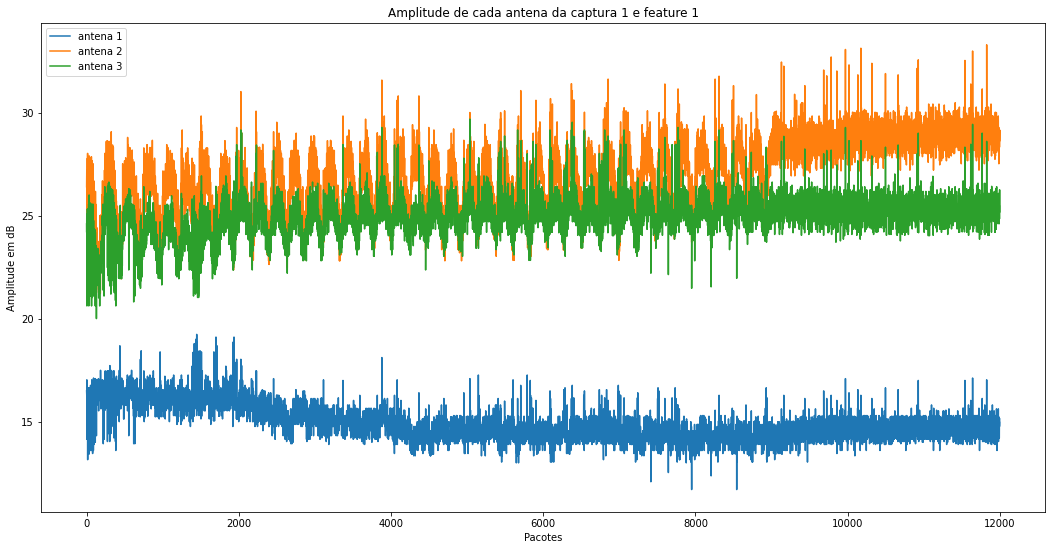

In [28]:
# plotando a amplitude (a parte real)
plt.figure(figsize=(18,9))
plt.plot(np.abs(antena1_feature1), label="antena 1")
plt.plot(np.abs(antena2_feature1), label="antena 2")
plt.plot(np.abs(antena3_feature1), label="antena 3")
plt.title("Amplitude de cada antena da captura 1 e feature 1")
plt.xlabel("Pacotes")
plt.ylabel("Amplitude em dB")
plt.legend()
plt.show()

> Como podemos ver, há diferenças entre os dados que cada antena captura.

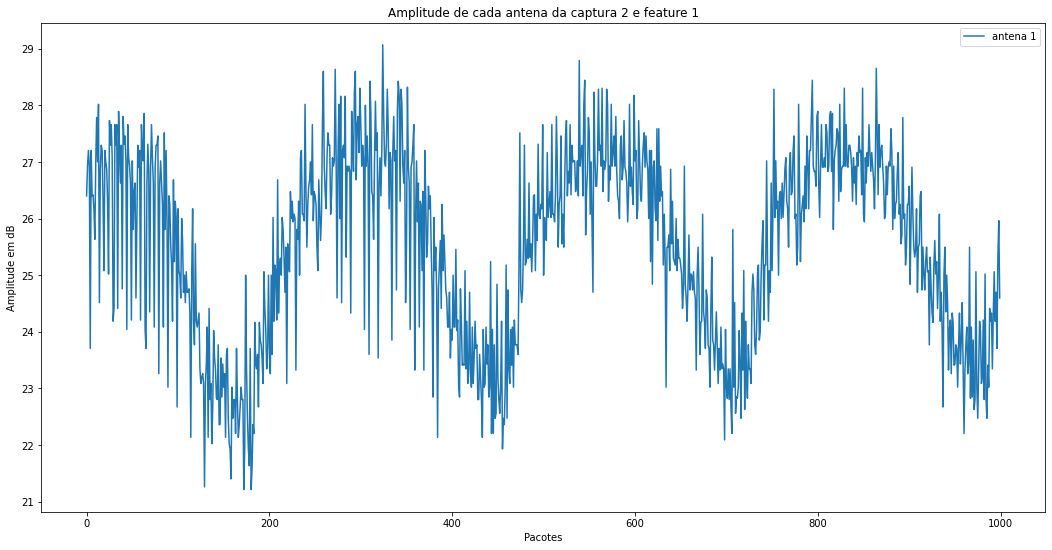

In [31]:
# vamos focar em uma antena apenas:
plt.figure(figsize=(18,9))
plt.plot(np.abs(antena2_feature1)[:1000], label="antena 1")

plt.title("Amplitude de cada antena da captura 2 e feature 1")
plt.xlabel("Pacotes")
plt.ylabel("Amplitude em dB")
plt.legend()
plt.show()

> Como podemos ver, a respiração está bem explícita nessa amostra que pegamos. Mas nem tudo são flores! Podemos perceber muito ruído presente nessa onda.